In [41]:
import scipy.io
import numpy as np
import pylab as pl

In [42]:
mat = scipy.io.loadmat('data/binaryalphadigs.mat')
data_digits = mat['dat'][:10,]
data_alpha = mat['dat'][10:,]
print("data_digits shape = {}".format(data_digits.shape))
print("data_alpha shape = {}".format(data_alpha.shape))

data_digits shape = (10, 39)
data_alpha shape = (26, 39)


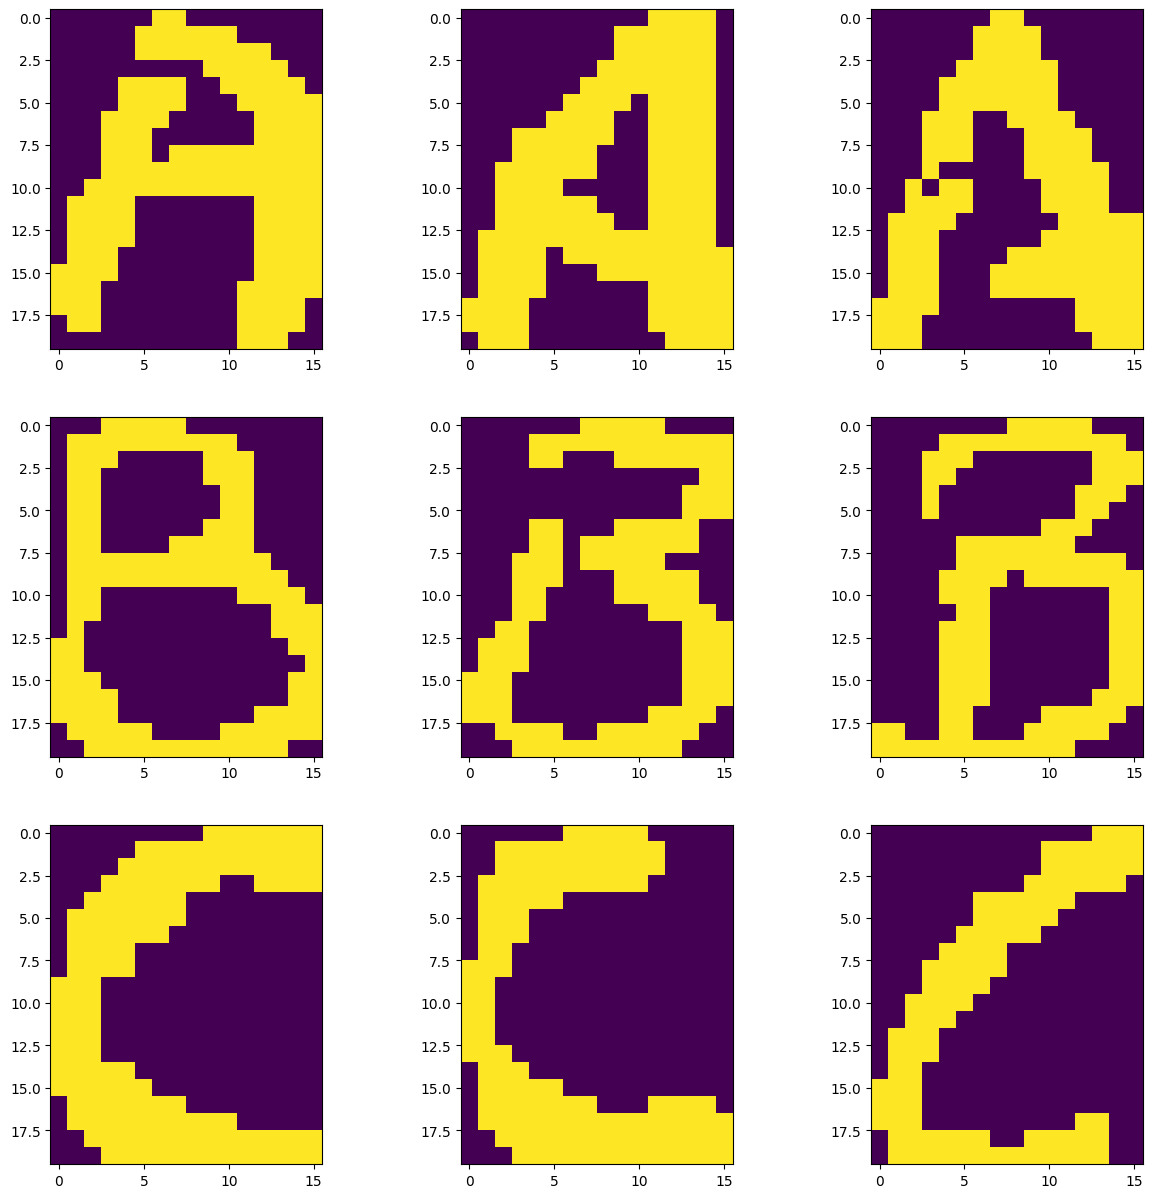

In [43]:
fig, ax = pl.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(data_alpha[i, j])


In [44]:
data_alpha[[0,1],].shape

(2, 39)

In [45]:
data_alpha.shape

(26, 39)

In [46]:
def lire_alpha_digits(data, list_index):
    m, n = data.shape
    p, q = data[0, 0].shape
    matrix = np.zeros((len(list_index)*n, p*q))
    for i, index in enumerate(list_index):
        for j in range(n):
            matrix[i*n + j] = data[index, j].reshape(p*q)
    return matrix

In [47]:
data_alpha_reshaped = lire_alpha_digits(data_alpha, [0])
data_digits_reshaped = lire_alpha_digits(data_digits, [0])

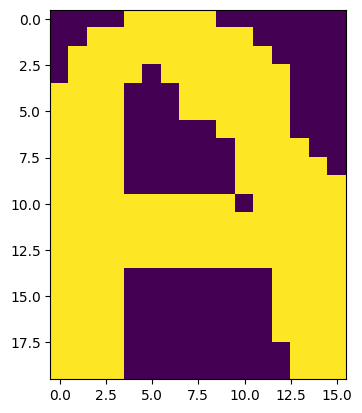

In [48]:
pl.imshow(data_alpha_reshaped[-1,:].reshape(20,16))

In [49]:
def init_RBM(p, q):
    a = np.zeros(p)
    b = np.zeros(q)
    W = np.random.normal(0, 0.1, size=(p, q))
    return W, a, b

In [50]:
init_RBM(3, 4)

(array([[-0.22137288, -0.09080302, -0.03830829, -0.14585233],
        [-0.00793302, -0.01931836,  0.14476421,  0.0561936 ],
        [ 0.01217285, -0.03548833, -0.07918006, -0.03260382]]),
 array([0., 0., 0.]),
 array([0., 0., 0., 0.]))

In [51]:
def entree_sortie_RBM(W, a, b, H):
    A = np.tile(a, (H.shape[0], 1))
    Z = np.transpose(W @ H.T) + A
    return np.exp(Z)/(1 + np.exp(Z))

def sortie_entree_RBM(W, a, b, V):
    B = np.tile(b, (V.shape[0], 1))
    Z = np.transpose(W.T @ V.T) + B
    return np.exp(Z)/(1 + np.exp(Z))

In [52]:
def split_in_batches(indexes, batch):
    Batches = []
    N = len(indexes) // batch
    for i in range(N):
        Batches.append(indexes[i*batch:i*batch+batch])
    Batches.append(indexes[N*batch:len(indexes)])
    return Batches

In [53]:
split_in_batches(np.arange(39), 5)

[array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24]),
 array([25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34]),
 array([35, 36, 37, 38])]

In [54]:
def train_RBM(W_init, a_init, b_init, X, niter, step, batch, verbose=True):
    assert(X.shape[1] == W_init.shape[0])
    W, a, b = W_init.copy(), a_init.copy(), b_init.copy()
    V = X.copy()
    batches_index = split_in_batches(np.arange(X.shape[0]), batch)
    for epoch in range(niter):
        loss = 0
        for batch in batches_index:
            X_batch = X[batch]
            Ph = sortie_entree_RBM(W, a, b, X_batch)
            H = np.round(Ph)
            Pv = entree_sortie_RBM(W, a, b, H)
            V = np.round(Pv)
            Mh = sortie_entree_RBM(W, a, b, V)
            loss += np.sum((V - X_batch)**2)

            # Compute the gradients
            grad_W = X_batch.T @ Ph - V.T @ Mh
            grad_a = np.sum(X_batch - V, axis=0)
            grad_b = np.sum(Ph - Mh, axis=0)

            # Update the parameters
            W += step*grad_W
            a += step*grad_a
            b += step*grad_b
        loss /= X.shape[0]
        if verbose:
            print("Epoch {}/{} : MSE = {}".format(epoch + 1, niter, loss))
    return W, a, b

In [55]:
W, a, b = init_RBM(320, 100)
W_star, a_star, b_star = train_RBM(W, a, b, data_alpha_reshaped, 60, 0.01, 10)

Epoch 1/60 : MSE = 122.05128205128206
Epoch 2/60 : MSE = 110.3076923076923
Epoch 3/60 : MSE = 100.74358974358974
Epoch 4/60 : MSE = 95.41025641025641
Epoch 5/60 : MSE = 86.66666666666667
Epoch 6/60 : MSE = 77.12820512820512
Epoch 7/60 : MSE = 73.35897435897436
Epoch 8/60 : MSE = 69.84615384615384
Epoch 9/60 : MSE = 61.94871794871795
Epoch 10/60 : MSE = 60.17948717948718
Epoch 11/60 : MSE = 56.23076923076923
Epoch 12/60 : MSE = 54.38461538461539
Epoch 13/60 : MSE = 47.8974358974359
Epoch 14/60 : MSE = 44.282051282051285
Epoch 15/60 : MSE = 42.666666666666664
Epoch 16/60 : MSE = 41.35897435897436
Epoch 17/60 : MSE = 40.61538461538461
Epoch 18/60 : MSE = 37.51282051282051
Epoch 19/60 : MSE = 34.92307692307692
Epoch 20/60 : MSE = 30.58974358974359
Epoch 21/60 : MSE = 30.17948717948718
Epoch 22/60 : MSE = 27.897435897435898
Epoch 23/60 : MSE = 27.641025641025642
Epoch 24/60 : MSE = 24.153846153846153
Epoch 25/60 : MSE = 22.53846153846154
Epoch 26/60 : MSE = 20.46153846153846
Epoch 27/60 : M

In [56]:
def generer_image_RBM(W, a, b, n_images, n_iter):
    X = np.random.normal(0, 0.1, size=(n_images, W.shape[0]))
    for _ in range(n_iter):
        Ph = sortie_entree_RBM(W, a, b, X)
        H = np.round(Ph)
        Pv = entree_sortie_RBM(W, a, b, H)
        X = np.round(Pv)
    return X

In [57]:
gen = generer_image_RBM(W_star, a_star, b_star, 9, 300)

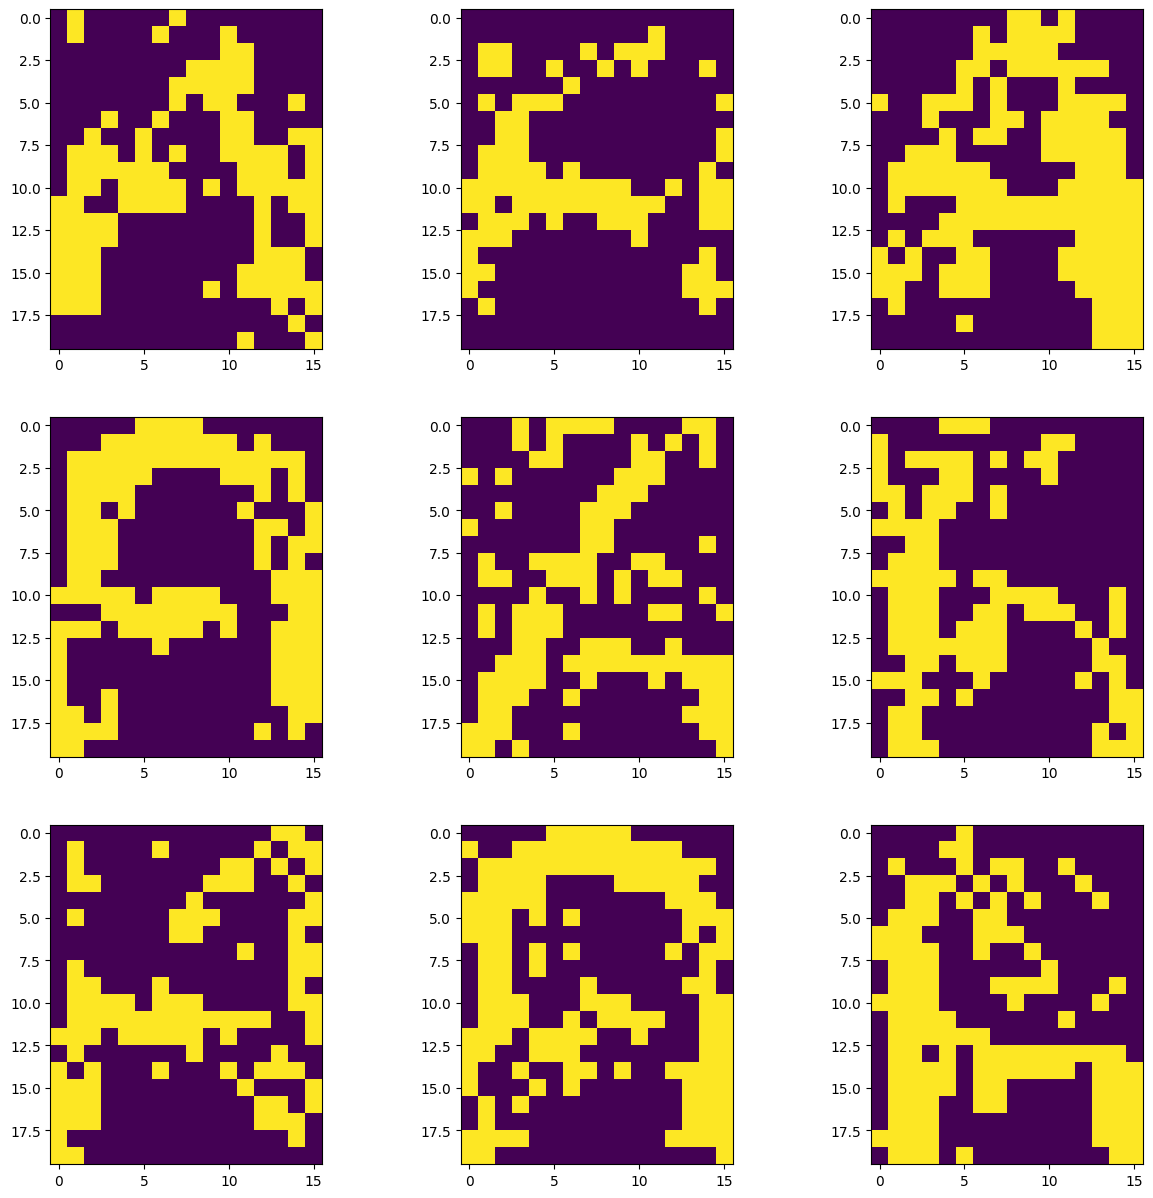

In [58]:
fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20,16))

In [59]:
class RbmModel():
    def __init__(self, q: int, p: int) -> None:
        """
        Initialise un modèle de Restricted Boltzmann Machine (RBM).

        Args:
            q (int): Nombre de neurones dans la couche visible.
            p (int): Nombre de neurones dans la couche cachée.
        """
        self.q = q
        self.p = p
        self.a = np.zeros(p)
        self.b = np.zeros(q)
        self.W = np.random.normal(0, 0.1, size=(p, q))
    
    def entree_sortie_RBM(self, H: np.ndarray) -> np.ndarray:
        """
        Calcule l'activation de la couche visible à partir de l'activation de la couche cachée.

        Args:
            H (np.ndarray): Matrice d'activations de la couche cachée.

        Returns:
            np.ndarray: Activation de la couche visible.
        """
        A = np.tile(self.a, (H.shape[0], 1))
        Z = np.transpose(self.W @ H.T) + A
        return np.exp(Z)/(1 + np.exp(Z))

    def sortie_entree_RBM(self, V: np.ndarray) -> np.ndarray:
        """
        Calcule l'activation de la couche cachée à partir de l'activation de la couche visible.

        Args:
            V (np.ndarray): Matrice d'activations de la couche visible.

        Returns:
            np.ndarray: Activation de la couche cachée.
        """
        B = np.tile(self.b, (V.shape[0], 1))
        Z = np.transpose(self.W.T @ V.T) + B
        return np.exp(Z)/(1 + np.exp(Z))
    
    def split_in_batches(indexes: np.ndarray, batch: int) -> list([np.ndarray]):
        """
        Divise une liste d'indices en lots de la taille spécifiée.

        Args:
            indexes (list): Liste des indices à diviser en lots.
            batch (int): Taille de chaque lot.

        Returns:
            list: Liste des lots d'indices.
        """
        Batches = []
        N = len(indexes) // batch
        for i in range(N):
            Batches.append(indexes[i*batch:i*batch+batch])
        Batches.append(indexes[N*batch:len(indexes)])
        return Batches
    
    def train_RBM(self, X: np.ndarray, niter: int, step: float, batch: int, verbose: bool = True) -> None:
        """
        Entraîne la RBM avec les données d'entrée spécifiées.

        Args:
            X (np.ndarray): Données d'entrée pour l'entraînement.
            niter (int): Nombre d'itérations d'entraînement.
            step (float): Taux d'apprentissage.
            batch (int): Taille de lot pour l'entraînement par lot.
            verbose (bool): Affiche ou non les détails de l'entraînement.
        """
        assert(X.shape[1] == self.W.shape[0])
        V = X.copy()
        batches_index = split_in_batches(np.arange(X.shape[0]), batch)
        rng = np.random.default_rng()
        for epoch in range(niter):
            loss = 0
            for batch in batches_index:
                X_batch = X[batch]
                Ph = self.sortie_entree_RBM(X_batch)
                H = rng.binomial(1, Ph, size=Ph.shape)
                Pv = self.entree_sortie_RBM(H)
                V = rng.binomial(1, Pv, size=Pv.shape)
                Mh = self.sortie_entree_RBM(V)
                loss += np.sum((V - X_batch)**2)

                # Compute the gradients
                grad_W = X_batch.T @ Ph - V.T @ Mh
                grad_a = np.sum(X_batch - V, axis=0)
                grad_b = np.sum(Ph - Mh, axis=0)

                # Update the parameters
                self.W += step*grad_W
                self.a += step*grad_a
                self.b += step*grad_b
            loss /= X.shape[0]
            if verbose:
                print("Epoch {}/{} : MSE = {}".format(epoch + 1, niter, loss))
    
    def generer_image_RBM(self, n_images: int, n_iter: int) -> np.ndarray:
        """
        Génère des images en utilisant le RBM.

        Args:
            n_images (int): Nombre d'images à générer.
            n_iter (int): Nombre d'itérations pour la génération.

        Returns:
            np.ndarray: Matrice des images générées.
        """
        X = np.random.normal(0, 0.1, size=(n_images, self.W.shape[0]))
        rng = np.random.default_rng()
        for _ in range(n_iter):
            Ph = self.sortie_entree_RBM(X)
            H = rng.binomial(1, Ph, size=Ph.shape)
            Pv = self.entree_sortie_RBM(H)
            X = rng.binomial(1, Pv, size=Pv.shape)
        return X

    

Epoch 1/100 : MSE = 137.2051282051282
Epoch 2/100 : MSE = 122.23076923076923
Epoch 3/100 : MSE = 117.76923076923077
Epoch 4/100 : MSE = 117.48717948717949
Epoch 5/100 : MSE = 113.12820512820512
Epoch 6/100 : MSE = 101.94871794871794
Epoch 7/100 : MSE = 100.23076923076923
Epoch 8/100 : MSE = 95.92307692307692
Epoch 9/100 : MSE = 92.48717948717949
Epoch 10/100 : MSE = 91.02564102564102
Epoch 11/100 : MSE = 85.97435897435898
Epoch 12/100 : MSE = 87.46153846153847
Epoch 13/100 : MSE = 82.0
Epoch 14/100 : MSE = 80.17948717948718
Epoch 15/100 : MSE = 80.74358974358974
Epoch 16/100 : MSE = 77.38461538461539
Epoch 17/100 : MSE = 75.41025641025641
Epoch 18/100 : MSE = 75.07692307692308
Epoch 19/100 : MSE = 72.7948717948718
Epoch 20/100 : MSE = 70.92307692307692
Epoch 21/100 : MSE = 68.66666666666667
Epoch 22/100 : MSE = 65.38461538461539
Epoch 23/100 : MSE = 64.35897435897436
Epoch 24/100 : MSE = 64.05128205128206
Epoch 25/100 : MSE = 62.30769230769231
Epoch 26/100 : MSE = 63.51282051282051
Epo

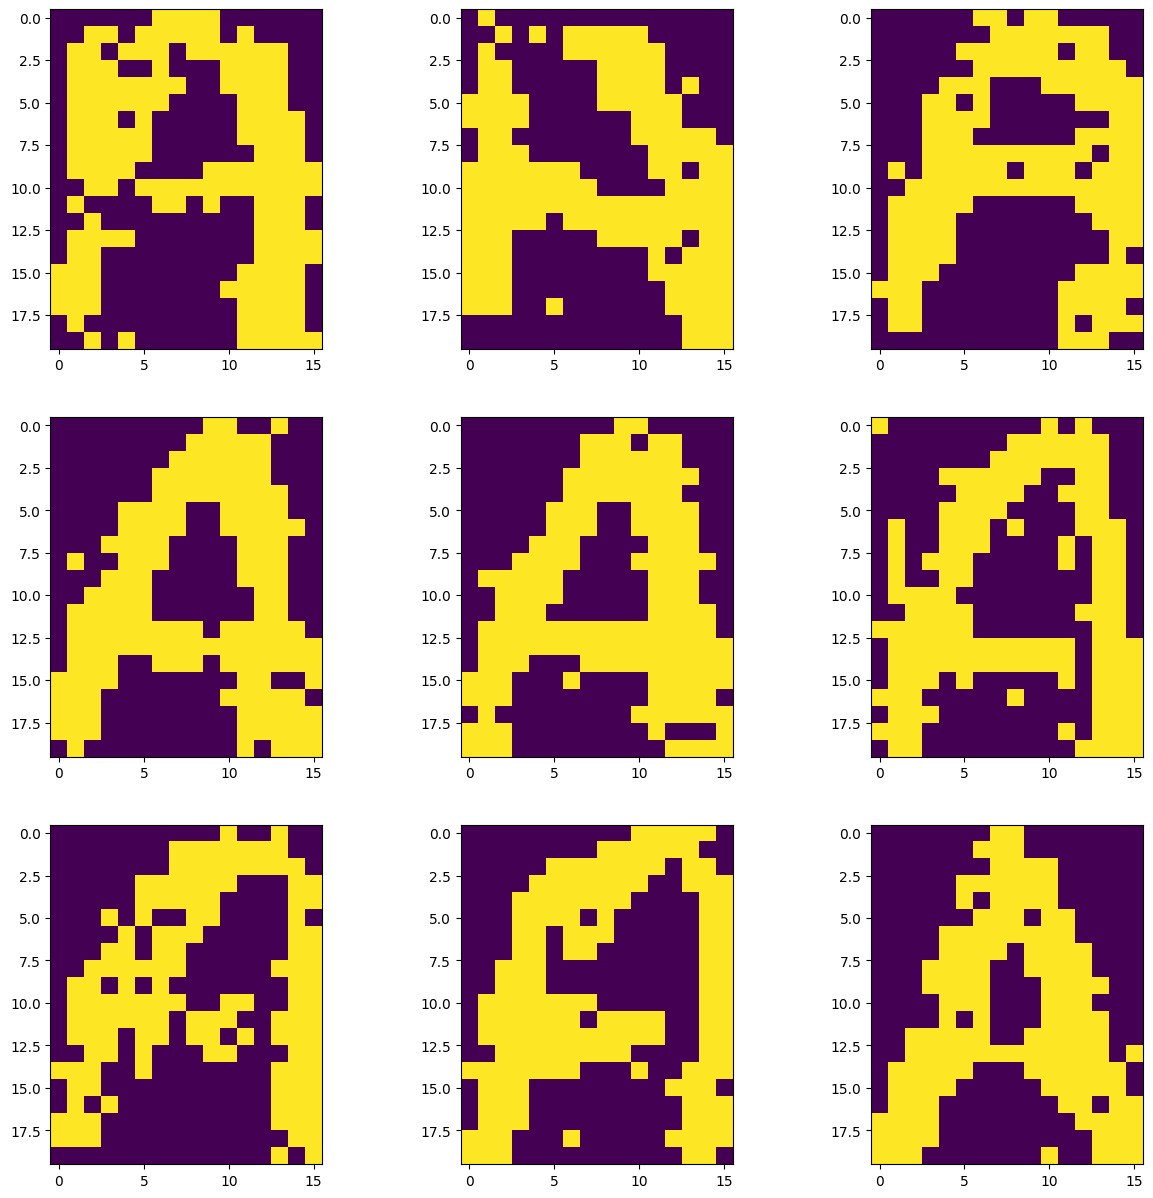

In [60]:
rbm = RbmModel(q=80, p=320)
rbm.train_RBM(data_alpha_reshaped, 100, 0.01, 10)
gen = rbm.generer_image_RBM(9, 100)

fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20,16))